## Lake Zug Water Samples Plan, 18.02.2026

In [35]:
# imports
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Lake Zug bathymetry
bathy = xr.open_dataset('Q:/Messdaten/Aphys_Hypothesis_data/Zugersee/bathymetry.nc')

In [34]:
ws_locs = pd.DataFrame({
    'loc': ['VMPS', 'VMPC', 'VMPN'],
    'xsc': [680442, 680105, 679250],
    'ysc': [216834, 218781, 220350]
})

ws_locs['xsc'] += int(2e6)
ws_locs['ysc'] += int(1e6)

ws_locs['total_depth'] = [bathy.sel(xsc=row.xsc, ysc=row.ysc).depth.item() for _, row in ws_locs.iterrows()]

ws_locs

,loc,xsc,ysc,total_depth
0,VMPS,2680442,1216834,200.63000
1,VMPC,2680105,1218781,177.31001
2,VMPN,2679250,1220350,121.14001


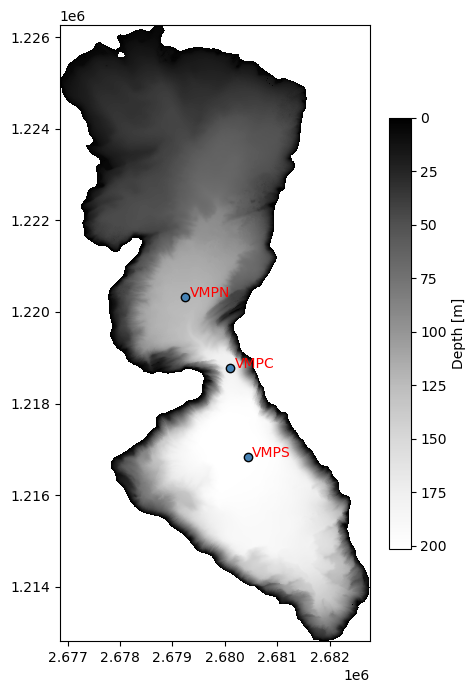

In [32]:
fig, ax = plt.subplots(figsize=(5, 8))

im = ax.pcolormesh(bathy['xsc'], bathy['ysc'], bathy['depth'], cmap='Greys_r', vmin=0)
cbar = fig.colorbar(im, shrink=0.7, label='Depth [m]', ax=ax)
cbar.ax.invert_yaxis()

# water sample locations
for _, row in ws_locs.iterrows():
    if row['loc'] in ['VMPS', 'VMPC', 'VMPN']:
        ax.scatter(row.xsc, row.ysc, c='steelblue', edgecolor='black')
        ax.annotate(row['loc'], (row.xsc, row.ysc), color='red', xytext=(3, 0), textcoords='offset points')

plt.show()

In [52]:
depths = pd.DataFrame({'depth': np.array([60, 80, 100, 120, 150, 180])})
ws_df = ws_locs.merge(depths, how='cross').query('total_depth > depth')
ws_df

,loc,xsc,ysc,total_depth,depth
0,VMPS,2680442,1216834,200.63000,60
1,VMPS,2680442,1216834,200.63000,80
2,VMPS,2680442,1216834,200.63000,100
3,VMPS,2680442,1216834,200.63000,120
4,VMPS,2680442,1216834,200.63000,150
5,VMPS,2680442,1216834,200.63000,180
6,VMPC,2680105,1218781,177.31001,60
7,VMPC,2680105,1218781,177.31001,80
8,VMPC,2680105,1218781,177.31001,100
9,VMPC,2680105,1218781,177.31001,120


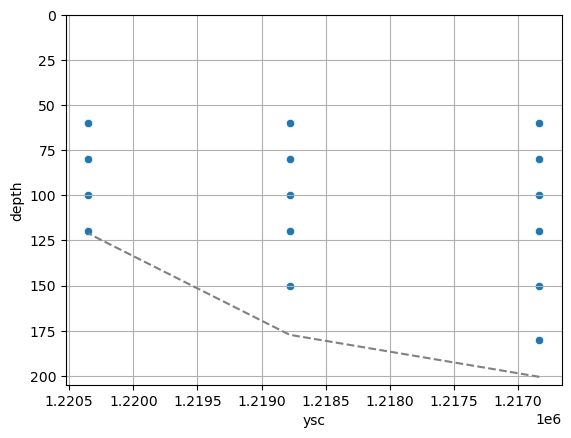

In [53]:
fig, ax = plt.subplots()

sns.scatterplot(ws_df, x='ysc', y='depth', ax=ax)
sns.lineplot(ws_locs, x='ysc', y='total_depth', color='gray', linestyle='--', ax=ax)

ax.set_ylim(0, 205)
ax.invert_xaxis()
ax.invert_yaxis()
ax.grid(True)
plt.show()